In [1]:
!pip install statsmodels seaborn


[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: C:\Users\Acer\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [2]:
# Import Packages
import pandas as pd
import numpy as np
import dateutil
# Visualization
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
# suppress the warning adding the following lines to the imports of your program
import warnings
#warnings.simplefilter(action='ignore', category=FutureWarning)
# ignore all warnings
warnings.filterwarnings('ignore')
%matplotlib inline
# sns.set(rc={'figure.figsize': [20, 20]}, font_scale=1.4)
sns.set_theme(color_codes=True)

In [3]:
# Retrieve the contents of the folder: data
url = "data"
url1 = "E:/"
# load the dataset
data = pd.read_csv("E:/DataSets/phone_data.csv")
#data = pd.read_csv("data/phone_data.csv")
# Display first 5 rows
data.head()

,index,date,duration,item,month,network,network_type
0,0,15/10/14 06:58,34.429,data,2014-11,data,data
1,1,15/10/14 06:58,13.000,call,2014-11,Vodafone,mobile
2,2,15/10/14 14:46,23.000,call,2014-11,Meteor,mobile
3,3,15/10/14 14:48,4.000,call,2014-11,Tesco,mobile
4,4,15/10/14 17:27,4.000,call,2014-11,Tesco,mobile


In [4]:
# Summary of the structure of the dataframe
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 830 entries, 0 to 829
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   index         830 non-null    int64  
 1   date          830 non-null    object 
 2   duration      830 non-null    float64
 3   item          830 non-null    object 
 4   month         830 non-null    object 
 5   network       830 non-null    object 
 6   network_type  830 non-null    object 
dtypes: float64(1), int64(1), object(5)
memory usage: 45.5+ KB


In [5]:
#Check the number of unique value from all of the object datatype
data.select_dtypes(include='object').nunique()

date            747
item              3
month             5
network           9
network_type      6
dtype: int64

In [6]:
# Descriptive or Summary Statistics of the numeric columns
data.describe()

,index,duration
count,830.000000,830.000000
mean,414.500000,117.804036
std,239.744656,444.129560
min,0.000000,1.000000
25%,207.250000,1.000000
50%,414.500000,24.500000
75%,621.750000,55.000000
max,829.000000,10528.000000


In [7]:
# Convert date from string to date times
data['date'] = data['date'].apply(dateutil.parser.parse,
dayfirst=True)

In [8]:
# How many rows in the dataset
no_of_records=data['item'].count()
print("Number of Records: ",no_of_records)

Number of Records:  830


In [9]:
# What was the longest phone call / data entry?
longest_call=data['duration'].max()
print("Longest Phone Call: ",longest_call)

Longest Phone Call:  10528.0


In [10]:
# How many entries are there for each month?
month_entries=data['month'].value_counts()
print("Month Entries are as follows:")
month_entries

Month Entries are as follows:


month
2014-11    230
2015-01    205
2014-12    157
2015-02    137
2015-03    101
Name: count, dtype: int64

In [11]:
# Get the first entry for each month
print("To Get the first entry for each month")
print(data.groupby('month').first())

To Get the first entry for each month
         index                date  duration  item   network network_type
month                                                                    
2014-11      0 2014-10-15 06:58:00    34.429  data      data         data
2014-12    228 2014-11-13 06:58:00    34.429  data      data         data
2015-01    381 2014-12-13 06:58:00    34.429  data      data         data
2015-02    577 2015-01-13 06:58:00    34.429  data      data         data
2015-03    729 2015-02-12 20:15:00    69.000  call  landline     landline


In [12]:
# Get the sum of the durations per month
print("To Get the sum of the durations per month")
print(data.groupby('month')['duration'].sum())

To Get the sum of the durations per month
month
2014-11    26639.441
2014-12    14641.870
2015-01    18223.299
2015-02    15522.299
2015-03    22750.441
Name: duration, dtype: float64


In [13]:
# To get the network that has a call duration greater than 10000
print("To get the network that has a call duration greater than 20000")
call_data=data[data['item'] == 'call'].groupby('network',as_index=False)['duration'].sum().reindex(columns=data.columns)
print(call_data.loc[call_data['duration']>10000,['network','duration']])

To get the network that has a call duration greater than 20000
    network  duration
1     Tesco   13828.0
2     Three   36464.0
3  Vodafone   14621.0
4  landline   18433.0


In [14]:
# How many calls, sms, and data entries are in each month?
print("Number of calls, sms, and data entries are in each month")
#print(data.groupby(['month', 'item'])['date'].count())
data.groupby(['month', 'item'])['date'].count()

Number of calls, sms, and data entries are in each month


month    item
2014-11  call    107
         data     29
         sms      94
2014-12  call     79
         data     30
         sms      48
2015-01  call     88
         data     31
         sms      86
2015-02  call     67
         data     31
         sms      39
2015-03  call     47
         data     29
         sms      25
Name: date, dtype: int64

<Figure size 1000x1000 with 0 Axes>

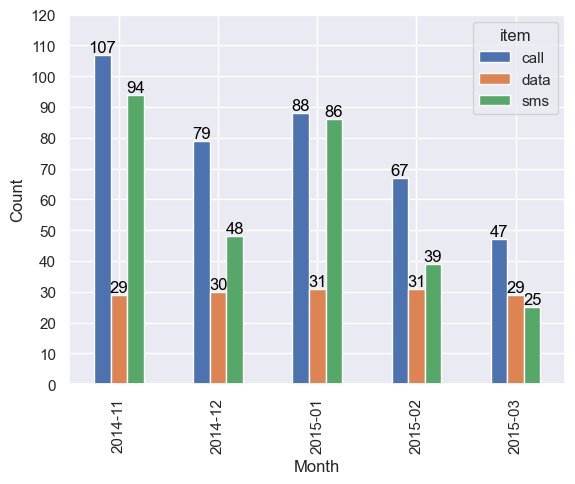

In [15]:
# Define the size of the graph
plt.figure(figsize=(10,10))

#data.groupby(['month', 'item'])['date'].count().unstack().plot.bar()
ax = data.groupby(['month', 'item'])['date'].count().unstack().plot.bar()
for c in ax.containers:
    #ax.bar_label(c, label_type='center',color='black')
    ax.bar_label(c, label_type='edge',color='black')
    
# Define x-axis range
plt.yticks(np.arange(0, 121, step=10))
# Define x-axis and y-axis labels
plt.xlabel ('Month', fontsize=12)
plt.ylabel ('Count', fontsize=12)

# save the graph into the file
plt.savefig('E:/DataSets/Phone-Data-Month-wise-items-graph.png', bbox_inches='tight',dpi=300)

# show plot
plt.show()